### Team Name: 
FAM

### Team Members:

Faisal Al shuraym, Asmaa Alrefae, Mansour Aljuaid

## Problem Statement 
We are given Titanic dataset in order to predict the survival rate of passengers. 

https://www.kaggle.com/faisalalshuraym/fam-titanic/edit/run/22659008

* the latest score at Kaggel is 0.76 but our highest score is 0.775

In [1]:
# import necessary libraries 
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# import models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# set display rows to 1000
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data cleaning 

In [2]:
train =pd.read_csv('/Users/faisalshuraym/desktop/sharing_project/Titanic_2/train.csv')

In [3]:
test =pd.read_csv('/Users/faisalshuraym/desktop/sharing_project/Titanic_2/test.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# filling the age 
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [11]:
# clean Age by breaking by fliing them with mean of each class 
mean_of_class =train[['Age','Pclass']].groupby('Pclass').mean()
mean_of_class

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [12]:
# group by age and Pclass and take the mean 
mean_of_class =test[['Age','Pclass']].groupby('Pclass').mean()

In [13]:
mean_of_class

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#defining a function 'impute_age'
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [16]:
# (for train) grab age and apply the impute_age, our custom function 
train['Age']= train.apply(lambda i : impute_age(i[['Age','Pclass']]),axis=1 )

In [17]:
#(for test) grab age and apply the impute_age, our custom function 
test['Age']= test.apply(lambda i : impute_age(i[['Age','Pclass']]),axis=1 )

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

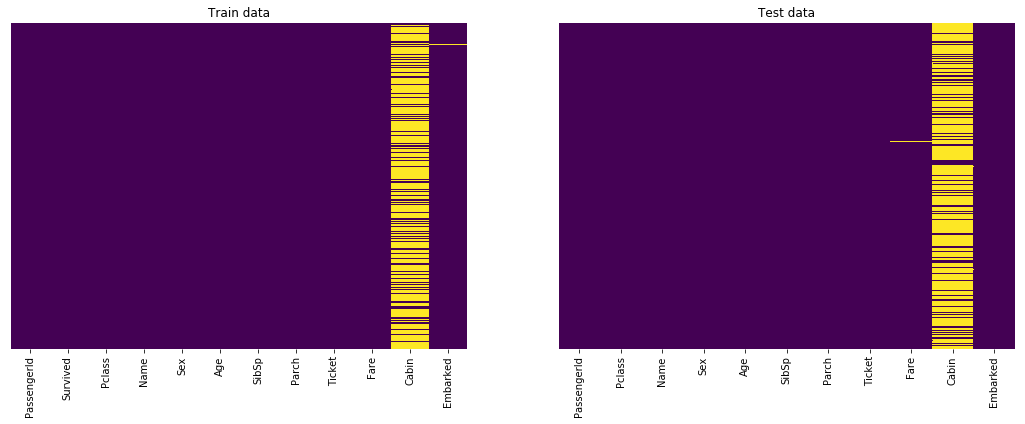

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

In [22]:
## clean cabin and fill it with zero and 1
train['Cabin'].value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
D                  3
E101               3
F2                 3
C22 C26            3
F33                3
D20                2
E121               2
E33                2
B22                2
D35                2
D36                2
B51 B53 B55        2
B49                2
B18                2
C124               2
C78                2
B28                2
D26                2
E44                2
E24                2
B20                2
E8                 2
C2                 2
D33                2
C92                2
C125               2
C68                2
C126               2
B58 B60            2
B77                2
F4                 2
E25                2
B35                2
C65                2
C123               2
D17                2
C52                2
C83                2
B57 B59 B63 B66    2
E67                2
C93                2
B5                 2
F G73              2
B69                1
C50          

In [23]:
# fill in nan with 0 
train.Cabin.fillna(0, inplace=True) 

In [24]:
# fill in 1 when we have string 
train.Cabin = train.Cabin.apply(lambda x: 0 if x !=0 else 1)

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test.Cabin.fillna(0, inplace=True) 

In [27]:
# fill in 1 for test datset
test.Cabin=test.Cabin.apply(lambda x: 0 if x !=0 else 1)

In [28]:
# dummy Embark dataset 
train['Embarked'].fillna('S', inplace=True)

In [29]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [30]:
# fill in test with the mean 
test['Fare'].fillna(test.Fare.mean(), inplace=True)

In [31]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,0,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,1,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,1,C


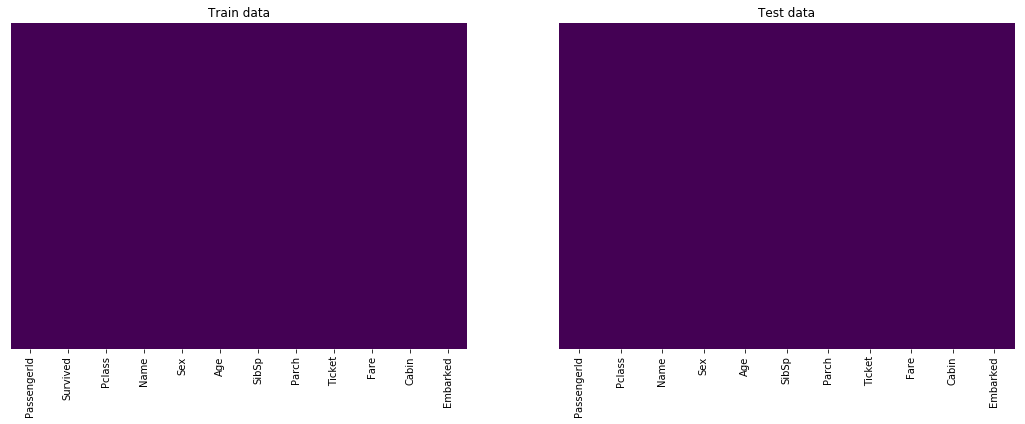

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

# Gender and Survived

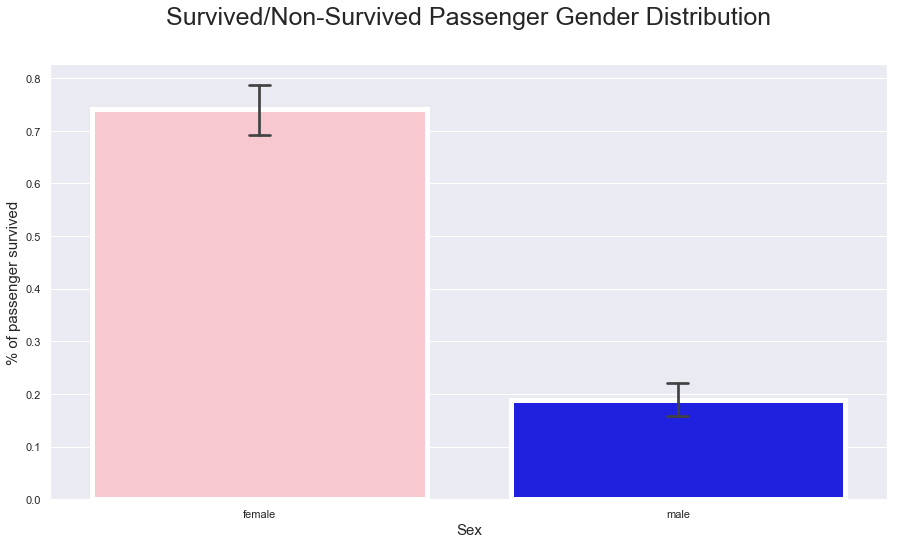

In [34]:
import seaborn as sns
pal = {'male':"blue", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "Sex", 
                 y = "Survived", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,

                )

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

Above bar plot shows the distribution of female and male survived. The x_label represents Sex feature while the y_label represents the % of passenger survived. Around ~74% female passenger survived while only ~19% male passenger survived.

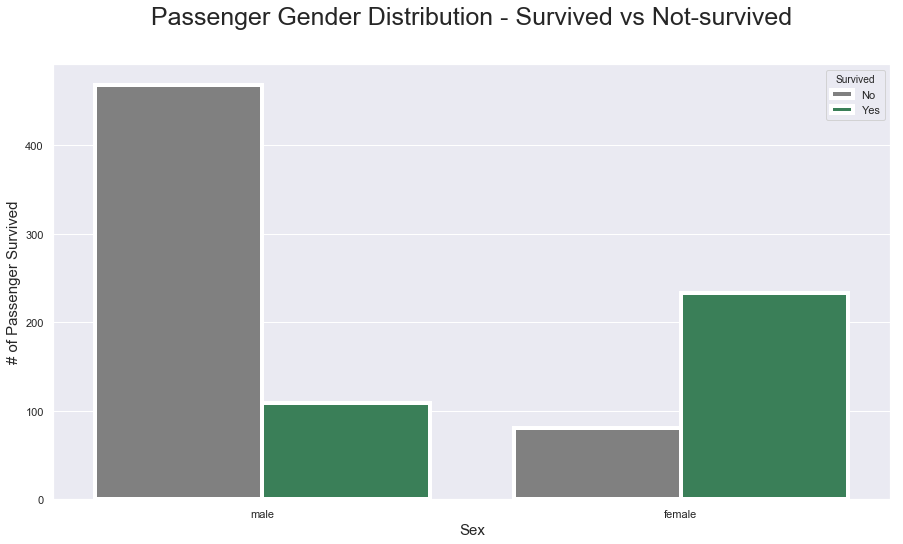

In [35]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=4, 
                   palette = pal
)

## Fixing title, xlabel and ylabel
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25, pad=40)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")

plt.show()

Above count plot shows the actual distribution of male and female passengers (survived Vs did not survive ). It shows that among all the females ~ 230 survived and ~ 70 did not survive. While among male passengers ~110 survived and ~480 did not survive.

# Pclass and Survived 

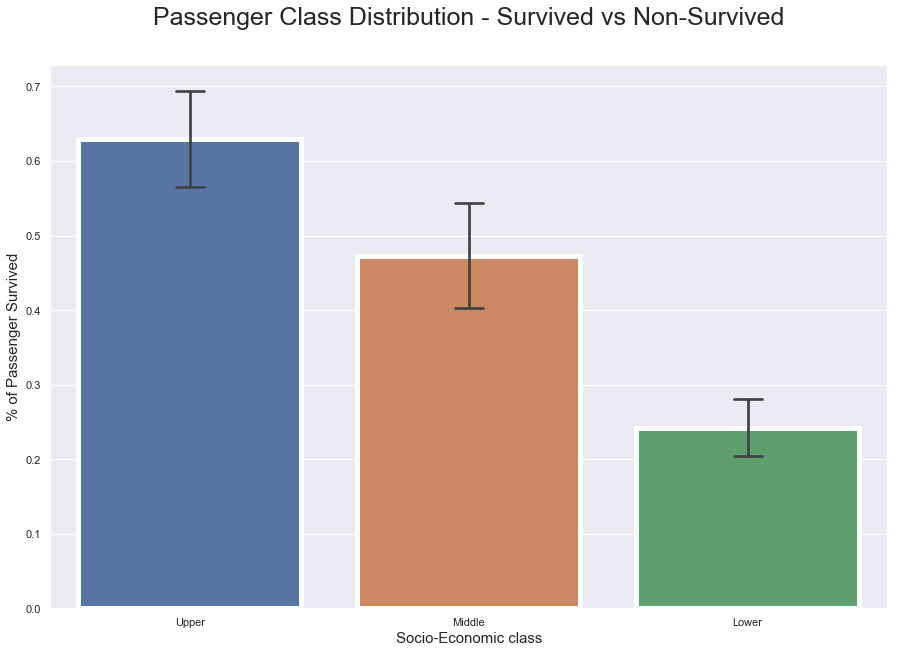

In [36]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=5,
            capsize = .1

           )
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25, pad=40)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

It looks like ...
~ 63% first class passenger survived titanic tragedy, while
~ 48% second class and
~ only 24% third class passenger survived.

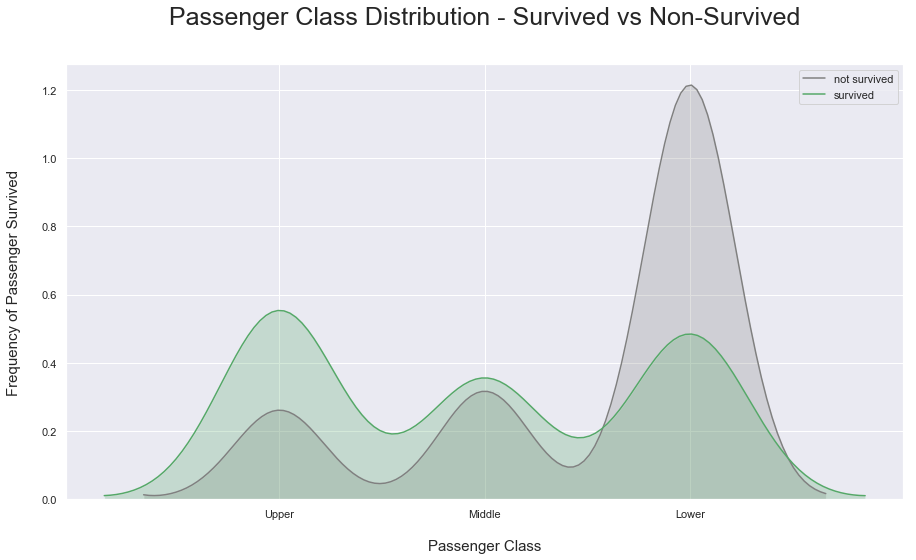

In [37]:
 #Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

This KDE plot is pretty self-explanatory with all the labels and colors. Something I have noticed that some readers might find questionable is that the lower class passengers have survived more than second-class passengers. It is true since there were a lot more third-class passengers than first and second.

# Fare and Survived

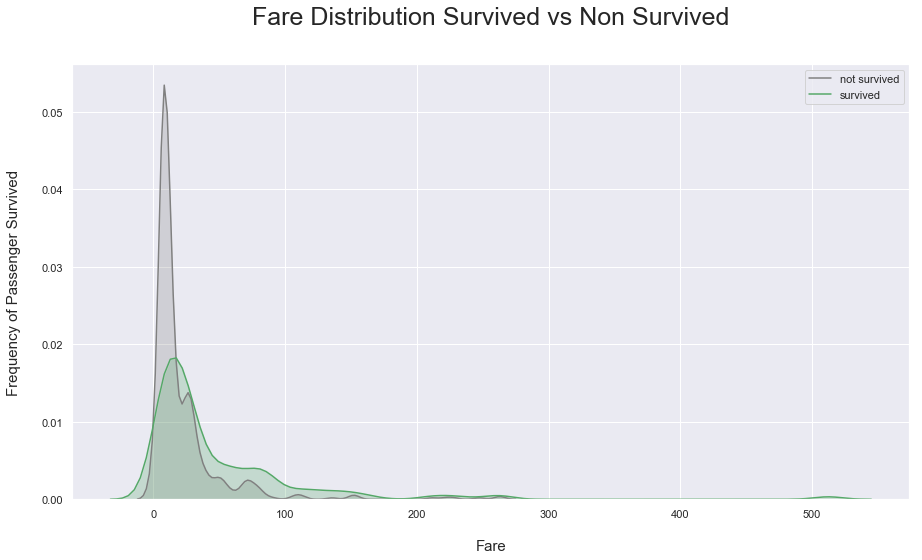

In [38]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);

The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment. Let's check...

In [39]:
train[train.Fare > 280]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,1,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,0,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,0,C


# Feture engeneering 

In [40]:
# (train )dummies for 'Embarked','Sex' columns 
train =pd.get_dummies(train,columns=['Embarked','Sex'],drop_first=True)

In [41]:
#(test) dummies for 'Embarked','Sex' columns
test =pd.get_dummies(test,columns=['Embarked','Sex'],drop_first=True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,1


In [43]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [44]:
test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1,0,1,0


In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

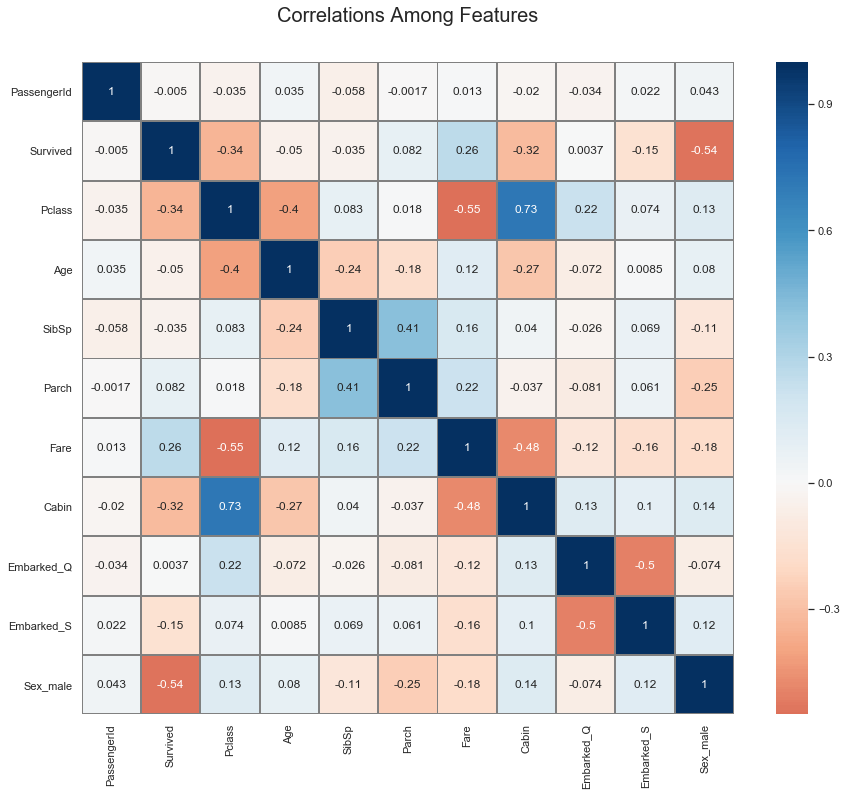

In [46]:
# corrlation heat map to the realtionship between the coulmns 
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='gray',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [47]:
# feutures  
X_train= train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S', 'Sex_male']]

In [48]:
# target 
y_train= train['Survived']

In [49]:
# fetures
X_test= test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S', 'Sex_male']]

In [50]:
# target 
y_test = train['Survived']

In [51]:
# importation 
from sklearn.preprocessing import StandardScaler 

In [52]:
# scale
ss = StandardScaler().fit(X_train)

In [53]:
# apply tranformation to dataset
ss.transform(X_train)

array([[ 0.82737724, -0.55018473,  0.43279337, ..., -0.30756234,
         0.61583843,  0.73769513],
       [-1.56610693,  0.66149881,  0.43279337, ..., -0.30756234,
        -1.62380254, -1.35557354],
       [ 0.82737724, -0.24726385, -0.4745452 , ..., -0.30756234,
         0.61583843, -1.35557354],
       ...,
       [ 0.82737724, -0.32299407,  0.43279337, ..., -0.30756234,
         0.61583843, -1.35557354],
       [-1.56610693, -0.24726385, -0.4745452 , ..., -0.30756234,
        -1.62380254,  0.73769513],
       [ 0.82737724,  0.20711748, -0.4745452 , ...,  3.25137334,
        -1.62380254,  0.73769513]])

In [54]:
# descalring Random forest Classifier 
from sklearn.model_selection import GridSearchCV

# Modeling 

In [55]:
# descalring Random forest Classifier 
rf = RandomForestClassifier() # bootstrap=True by default #max_features='auto',

In [56]:
# fit our model to random forest 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
rf.score(X_train,y_train) 

0.9753086419753086

In [58]:
cross_val_score(rf,X_train,y_train).mean()

0.8047138047138048

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
# specify parameters and distributions to sample from
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_features':[2, 3, 5, 7, 8],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'criterion':['gini', 'entropy'],
}

In [61]:
gs = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose= 1)

In [62]:
gs.fit(X_train,y_train)
pred_gs = gs.predict(X_test) 

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.6min finished


In [63]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
gs.best_score_

0.8372615039281706

In [65]:
cross_val_score(gs,X_train,y_train,).mean()

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  1.4min finished


0.8237934904601572

In [68]:
sub = pd.DataFrame()
sub['PassengerId'] = test.PassengerId
sub['Survived'] = pred_gs
sub.to_csv('submission_Titanic_final.csv',index=False)

## Titanic dictionary
|Feature|Score|
|---|---|
|**RandomForestClassifier**|*0.968574*|
|**GridSearchCV**|*0.838383*|


- we have used varity of classification models however we found out that random forest classifier is the best score 
